In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',123)
np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

In [2]:
#import application data csv
df_app = pd.read_csv("application_data.csv")

In [3]:
#display first few rows of the application data csv
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
#display shape of the df_app DataFrame
df_app.shape

(307511, 122)

In [188]:
#display info of the df_app DataFrame
df_app.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [189]:

df_app.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

as we can see due to large number of columns in the application dataframe it is difficult to analys each and every column hence we will find out columns having more than 30% of null values and drop them.

In [16]:
# get values of columns having null values.
Col_null = df_app.isnull().sum()

In [17]:
# to get the columns having more than 30% of null values
Col_null_30 = Col_null[Col_null.values >=(0.3*len(df_app))]

In [18]:
Col_null_30.values

array([202929,  96391, 173378, 156061, 179943, 150007, 204488, 214865,
       163891, 154828, 153020, 208642, 182590, 210199, 154350, 213514,
       169682, 156061, 179943, 150007, 204488, 214865, 163891, 154828,
       153020, 208642, 182590, 210199, 154350, 213514, 169682, 156061,
       179943, 150007, 204488, 214865, 163891, 154828, 153020, 208642,
       182590, 210199, 154350, 213514, 169682, 210295, 154297, 148431,
       156341, 145755], dtype=int64)

In [13]:
len(Col_null_30)

50

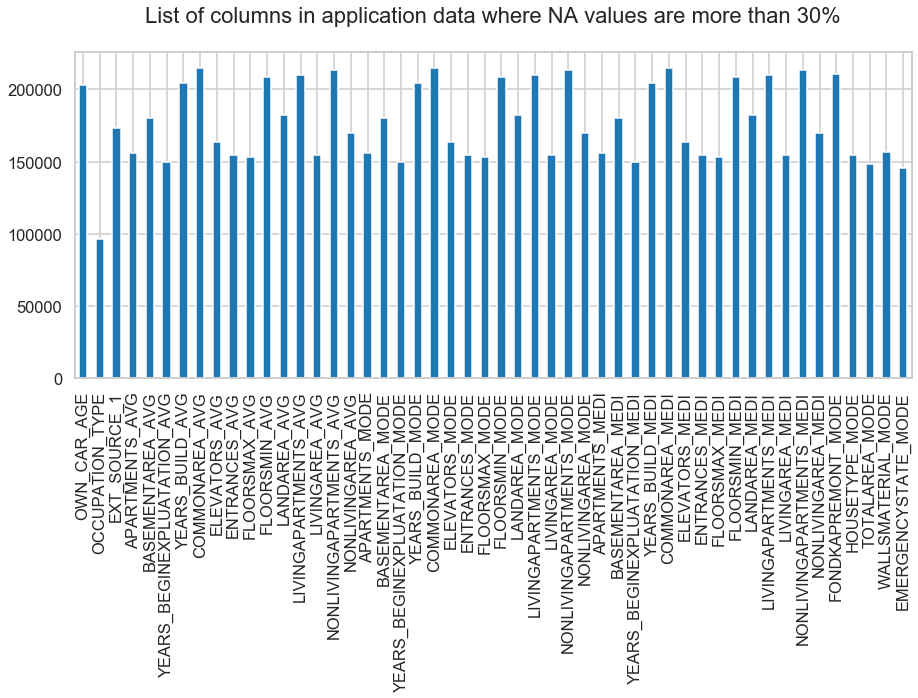

In [194]:
plt.figure(figsize = (15,6))
Col_null_15.plot(kind='bar')
plt.title("List of columns in application data where NA values are more than 30%")
plt.show()

as above columns have 30% or more missing values present in them, we can drop these columns.

#Find the columns having null values lesss than 30% 

In [195]:
df_app.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

# Imputing null values for the columns having very less null values

In [23]:
df_app.AMT_ANNUITY.isnull().sum()

12

In [197]:
df_app.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

Since AMT_ANNUITY have outlier which is very big hence we have to use median of AMT_ANNUITY to impute the column

In [15]:
df_app.AMT_ANNUITY.median()

24903.0

In [21]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [31]:
df_app['REGION_POPULATION_RELATIVE'].isnull().sum()  # we donot have many columns with relatively small null values percentage 

0

In [199]:
# Categorical columns analysis

In [19]:
df_app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

since XNA are missing values and CODE_GENDER = F have maximum frequency hence suggesting to  impute CODE_GENDER rows with values as XNA as F

In [201]:
df_app.ORGANIZATION_TYPE.describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [202]:
df_app.ORGANIZATION_TYPE.value_counts(normalize = True)*100

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

#Since in ORGANIZATION_TYPE column XA is only 18% we can drop the rows with XA.

In [203]:
#Binning AMT_ANNUITY column

In [204]:
df_app.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [205]:
#changing client's age from negative to positive
df_app['DAYS_BIRTH'] = df_app['DAYS_BIRTH'].abs()

In [206]:
df_app['DAYS_BIRTH']

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [207]:
#changing number of days client's changes the phone number from negative to positive
df_app['DAYS_LAST_PHONE_CHANGE'] = df_app['DAYS_LAST_PHONE_CHANGE'].abs()

In [208]:
df_app['DAYS_LAST_PHONE_CHANGE']

0         1134.0
1          828.0
2          815.0
3          617.0
4         1106.0
           ...  
307506     273.0
307507       0.0
307508    1909.0
307509     322.0
307510     787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64

#Bi-Varient analysis 

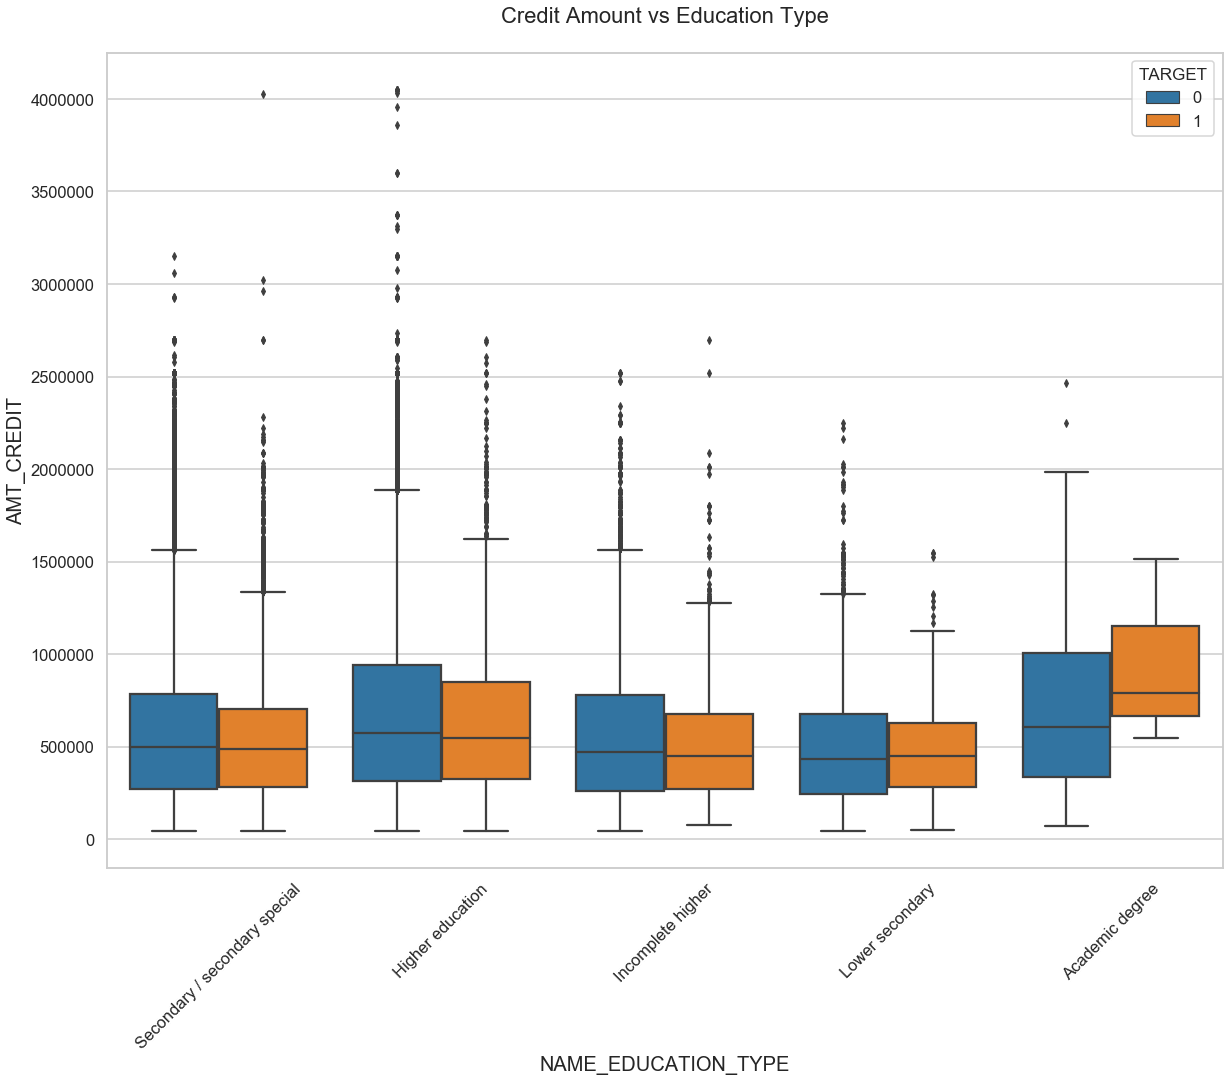

In [209]:
plt.figure(figsize = (20,15))
plt.xticks(rotation=45)
#plt.yscale('log')
sns.boxplot(data = df_app,x ='NAME_EDUCATION_TYPE' , y= 'AMT_CREDIT', hue ='TARGET')
plt.title("Credit Amount vs Education Type")
plt.show()

Following are the details.

1.Customers having academeic degree have higher number credits.
2.Customers having higher degree and high credits have difficulties of paying. 

In [32]:
bins = [0,10000,200000,300000,400000,500000,600000,700000]
labels  = ['0-10000','10000-50000','50000-100000','100000-200000','200000-300000','300000-400000','400000 & above']

In [33]:
df_app['AMT_INCOME_RANGE']=pd.cut(df_app['AMT_INCOME_TOTAL'],bins,labels=labels)

In [34]:
#create a DataFrame with data of clients having difficulties in payemnet of loan. 
df_app_1 = df_app.loc[df_app['TARGET'] == 1]

# Analysing dataframe with Target as 1

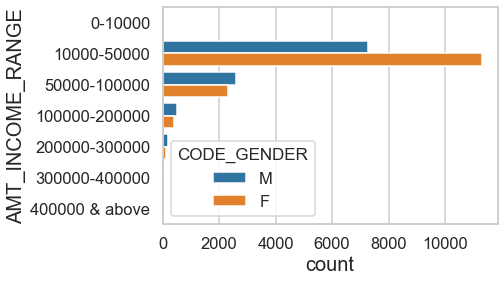

In [213]:

sns.countplot(y='AMT_INCOME_RANGE',hue = 'CODE_GENDER' ,data=df_app_1)


Customers having income group between 10000 to 50000 having troubles in payment.
Females are more in that income group
As the income group increase number of customers having troubles in payment drecreases. 

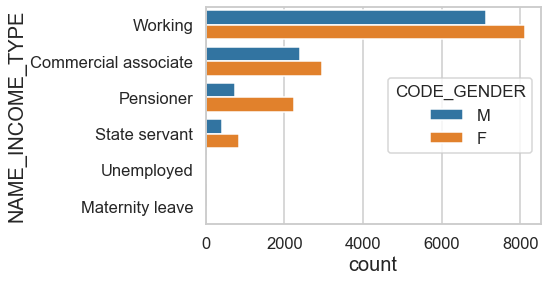

In [214]:
sns.countplot(y='NAME_INCOME_TYPE',hue = 'CODE_GENDER' ,data=df_app_1)

Working class customers have most number of instances with trouble in payment.
State Servant customers have least number of instances with trouble in payment.
Females are having more credits than males in all the income types.

Text(0.5, 1.0, 'Contract Type vs Code Gender')

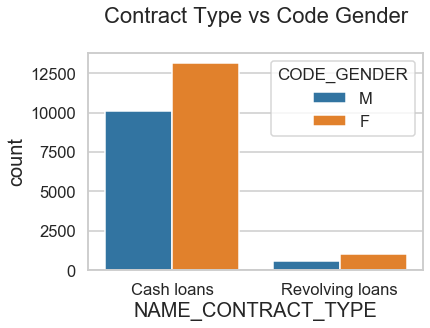

In [215]:
# contract type depends on payment
sns.countplot(x='NAME_CONTRACT_TYPE',hue = 'CODE_GENDER' ,data=df_app_1)
plt.title("Contract Type vs Code Gender")

following are the observations from above graph
1. contract type 'cash loans' applied for higher number of credits than 'revolving loans'
2. Females have higher number of credits in both the contract type. 

In [216]:
#removing columns having 'XA' values for further analysis and storing values in another dataframe.
df_app_1_XA= df_app_1.drop(df_app_1.loc[df_app_1['ORGANIZATION_TYPE']=='XNA'].index)

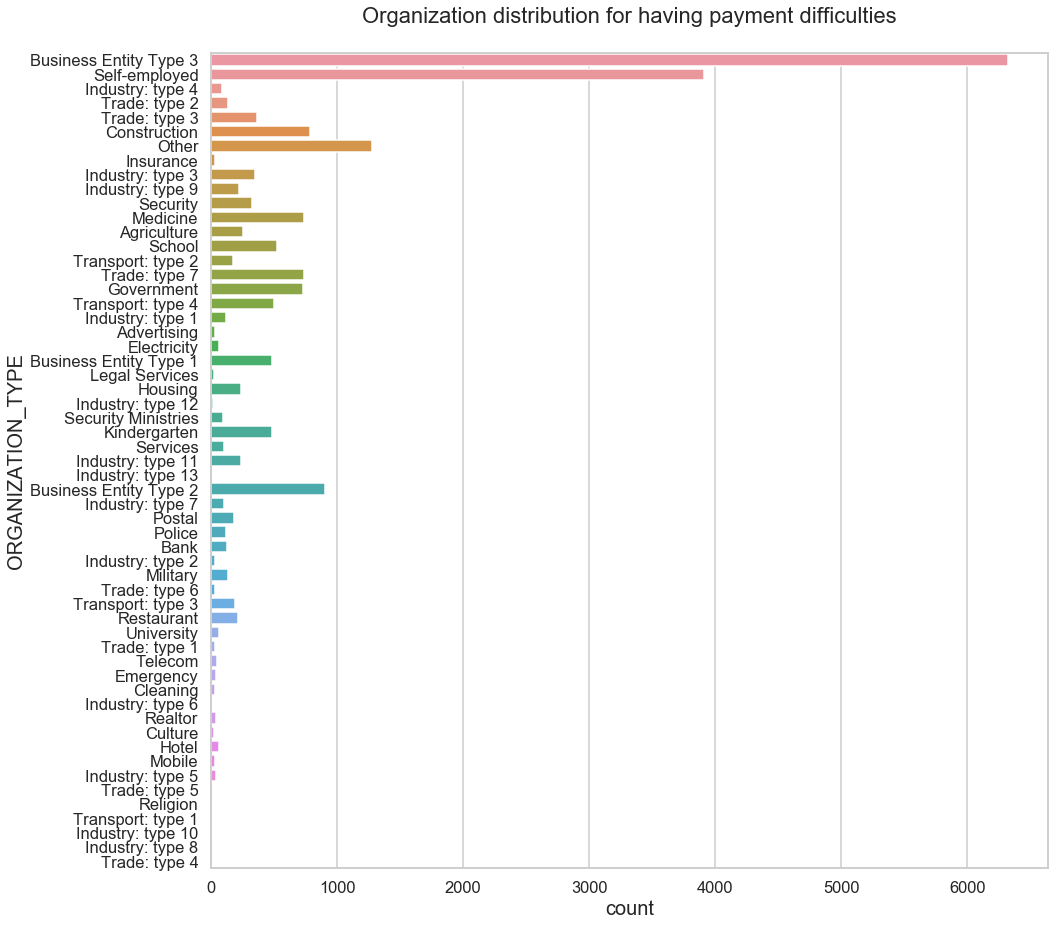

In [217]:
# oragnization distribution for having payment difficulties.
a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(y='ORGANIZATION_TYPE' ,data=df_app_1_XA,ax=ax)
plt.title("Organization distribution for having payment difficulties")
plt.show()

Following are the observations:

1.Customers in organization type as 'Business Entity Type 3' have applied maximum number for credits.
2.Customer in organization type as 'Industry:type 5' have applied for least number of credits.

In [218]:
# finding correlation among columns for target 1 dataframe

In [219]:
df_app_1.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 123 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   SK_ID_CURR                    int64   
 1   TARGET                        int64   
 2   NAME_CONTRACT_TYPE            object  
 3   CODE_GENDER                   object  
 4   FLAG_OWN_CAR                  object  
 5   FLAG_OWN_REALTY               object  
 6   CNT_CHILDREN                  int64   
 7   AMT_INCOME_TOTAL              float64 
 8   AMT_CREDIT                    float64 
 9   AMT_ANNUITY                   float64 
 10  AMT_GOODS_PRICE               float64 
 11  NAME_TYPE_SUITE               object  
 12  NAME_INCOME_TYPE              object  
 13  NAME_EDUCATION_TYPE           object  
 14  NAME_FAMILY_STATUS            object  
 15  NAME_HOUSING_TYPE             object  
 16  REGION_POPULATION_RELATIVE    float64 
 17  DAYS_BIRTH                    int64   
 18  DAYS

In [220]:
['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

['TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

In [221]:
df_app1_corre = df_app_1[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']]

In [222]:
coor1 = df_app1_corre.corr()

In [223]:
coor1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,0.004796,-0.001675,0.031257,-0.031975,-0.259109,-0.191942,0.149154,-0.032299,-0.023899,-0.012073,-0.001174,0.046115,0.053515
AMT_INCOME_TOTAL,0.004796,1.000000,0.038131,0.046421,0.009135,-0.003096,-0.014979,0.000158,-0.004215,0.013775,0.013409,-0.002223,-0.003019,-0.001353
AMT_CREDIT,-0.001675,0.038131,1.000000,0.752195,0.069161,0.135316,-0.000968,-0.025854,-0.052329,0.031782,0.033554,-0.033034,-0.037720,-0.016509
AMT_ANNUITY,0.031257,0.046421,0.752195,1.000000,0.071690,0.014303,-0.082552,0.034279,-0.016767,0.031236,0.064109,-0.005745,0.001997,0.009902
REGION_POPULATION_RELATIVE,-0.031975,0.009135,0.069161,0.071690,1.000000,0.048190,0.015103,-0.056222,-0.015537,0.142744,0.046059,-0.059718,-0.052369,-0.020428
DAYS_BIRTH,-0.259109,-0.003096,0.135316,0.014303,0.048190,1.000000,0.575097,-0.289114,-0.252863,-0.062172,-0.045517,-0.161858,-0.215192,-0.123623
DAYS_EMPLOYED,-0.191942,-0.014979,-0.000968,-0.082552,0.015103,0.575097,1.000000,-0.188929,-0.226470,-0.059997,-0.077201,-0.084961,-0.242019,-0.196453
DAYS_REGISTRATION,0.149154,0.000158,-0.025854,0.034279,-0.056222,-0.289114,-0.188929,1.000000,0.096833,-0.032518,0.015547,0.048585,0.088427,0.062636
DAYS_ID_PUBLISH,-0.032299,-0.004215,-0.052329,-0.016767,-0.015537,-0.252863,-0.226470,0.096833,1.000000,0.021661,0.020241,0.067427,0.070224,0.031431
HOUR_APPR_PROCESS_START,-0.023899,0.013775,0.031782,0.031236,0.142744,-0.062172,-0.059997,-0.032518,0.021661,1.000000,0.053438,0.008934,0.019480,0.014899


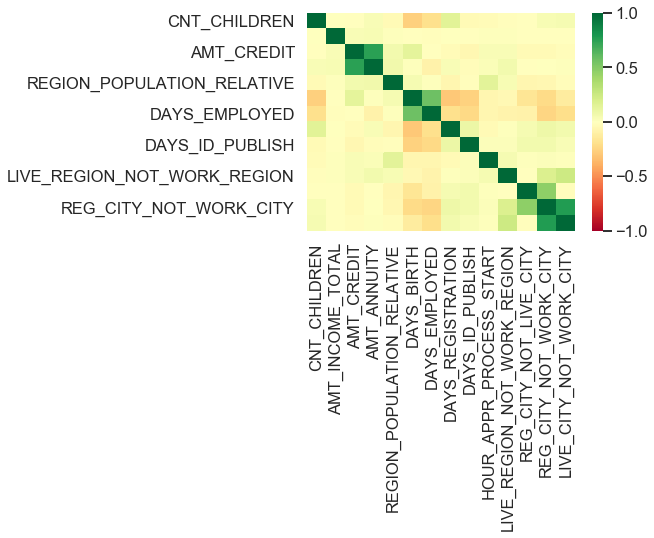

In [224]:
# Analysing using heatmap
sns.heatmap(data =coor1,cmap= 'RdYlGn',annot=False,vmin = -1, vmax = 1, center = 0)

Folllowing are the observations.

1. AMT_CREDIT is inversely proportional to the CNT_CHILDREN
2. AMT_CREDIT is positive co related to the AMT_INCOME_TOTAL
3. AMT_cREDIT is positive co related to the Density of the population.

# Analysing dataframe with Target as 0


In [225]:
#create a DataFrame with data of clients having no difficulties in payemnet of loan. 
df_app_0 = df_app.loc[df_app['TARGET'] == 0]

In [226]:
df_app_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,0.0345,0.2917,0.3333,0.013,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.804,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50000-100000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,10000-50000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,N

In [227]:
#removing rows having 'XNA' values for further analysis and storing values in another dataframe.
df_app_0_XA= df_app_0.drop(df_app_0.loc[df_app_0['ORGANIZATION_TYPE']=='XNA'].index)

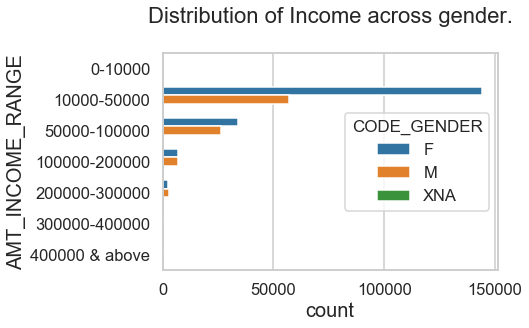

In [228]:
sns.countplot(y='AMT_INCOME_RANGE',hue = 'CODE_GENDER' ,data=df_app_0)
plt.title("Distribution of Income across gender.")
plt.show()

    Following are the observations.
1. Females applied for more number of loans than Males.
2. Most of the Customers who applied for the loans are in the income range from '10000 - 50000'
3. Count of Customers who applied for the loans in the income range from '200000 - 300000' are least.
4. As the income range increases number of loans applied by Females decreases and there is not count of females after income range 300000 .

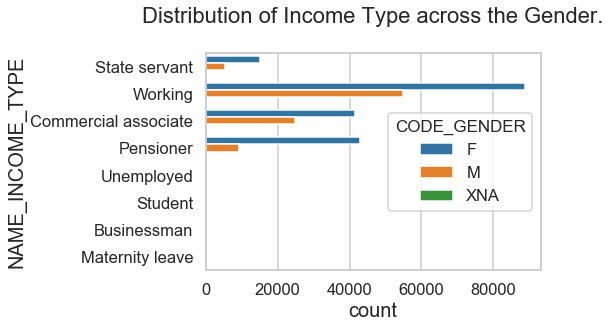

In [229]:
#CODE_GENDER = df_app_0['CODE_GENDER'].value_counts(normalize=True, sort=False)
sns.countplot(y='NAME_INCOME_TYPE',hue = 'CODE_GENDER' ,data=df_app_0)
plt.title("Distribution of Income Type across the Gender.")
plt.show()

In [230]:
df_app_0.NAME_INCOME_TYPE.value_counts()

Working                 143550
Commercial associate     66257
Pensioner                52380
State servant            20454
Student                     18
Unemployed                  14
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64

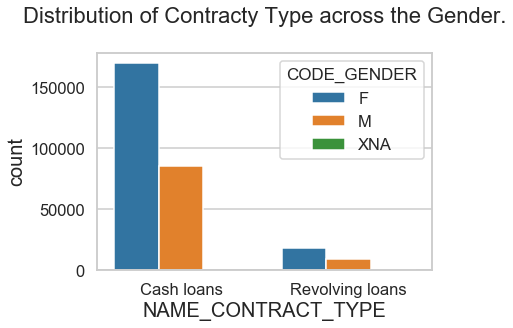

In [231]:
# contract type depends on payment
sns.countplot(x='NAME_CONTRACT_TYPE',hue = 'CODE_GENDER' ,data=df_app_0)
plt.title("Distribution of Contracty Type across the Gender.")
plt.show()

Following are the observations.

1. For contract type 'cash loans' number of credits applied are maximum.
2. Females have applied for more loans than Males.

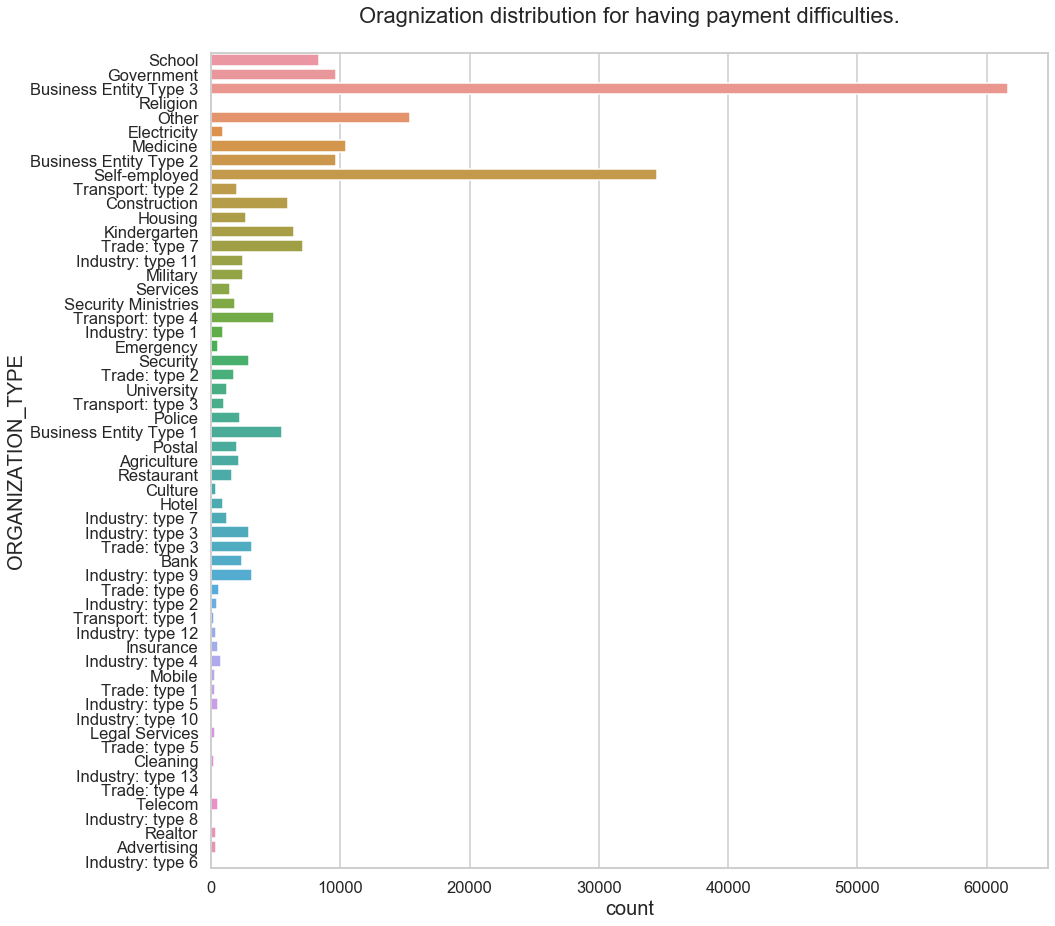

In [232]:
# oragnization distribution for having payment difficulties.
a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(y='ORGANIZATION_TYPE' ,data=df_app_0_XA,ax=ax)
plt.title("Oragnization distribution for having payment difficulties.")
plt.show()

Following are the observations.

1. Maximum number of credits are applied from Oraganization type 'Business Entity Type 3'
2. Customers applied less number of credits are from 'Culture','Mobile','Cleaning'

In [233]:
df_app0_corre = df_app_0[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']]

In [234]:
corr_0 = df_app0_corre.corr()

In [235]:
corr_0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,0.027397,0.003081,0.020905,-0.024363,-0.336966,-0.243356,0.185792,-0.028751,-0.005244,0.017326,0.021587,0.072193,0.070988
AMT_INCOME_TOTAL,0.027397,1.000000,0.342799,0.418953,0.167851,-0.062609,-0.141250,0.064937,0.022896,0.076743,0.127701,0.010567,0.017618,0.020684
AMT_CREDIT,0.003081,0.342799,1.000000,0.771309,0.100604,0.047378,-0.072515,0.013477,-0.001464,0.053619,0.054250,-0.025036,-0.015703,0.002506
AMT_ANNUITY,0.020905,0.418953,0.771309,1.000000,0.120988,-0.012263,-0.106425,0.039436,0.014113,0.053589,0.075487,-0.005675,0.001520,0.010582
REGION_POPULATION_RELATIVE,-0.024363,0.167851,0.100604,0.120988,1.000000,0.025244,-0.006961,-0.052083,-0.001071,0.172814,0.083965,-0.048217,-0.041516,-0.013502
DAYS_BIRTH,-0.336966,-0.062609,0.047378,-0.012263,0.025244,1.000000,0.618048,-0.333151,-0.271314,-0.095916,-0.071648,-0.179772,-0.241904,-0.160072
DAYS_EMPLOYED,-0.243356,-0.141250,-0.072515,-0.106425,-0.006961,0.618048,1.000000,-0.210187,-0.274290,-0.094844,-0.097022,-0.089586,-0.254453,-0.219190
DAYS_REGISTRATION,0.185792,0.064937,0.013477,0.039436,-0.052083,-0.333151,-0.210187,1.000000,0.100236,-0.008044,0.028475,0.064216,0.098919,0.072248
DAYS_ID_PUBLISH,-0.028751,0.022896,-0.001464,0.014113,-0.001071,-0.271314,-0.274290,0.100236,1.000000,0.033980,0.035069,0.075096,0.099628,0.062259
HOUR_APPR_PROCESS_START,-0.005244,0.076743,0.053619,0.053589,0.172814,-0.095916,-0.094844,-0.008044,0.033980,1.000000,0.061692,0.019100,0.023102,0.016447


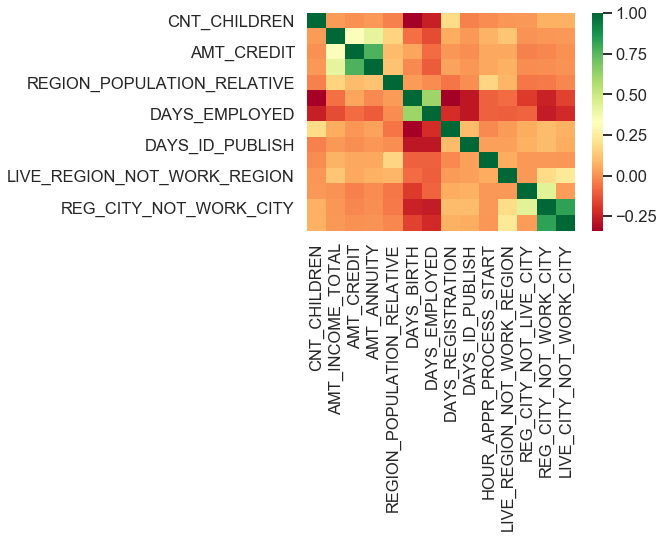

In [236]:
sns.heatmap(corr_0, cmap="RdYlGn",annot=False)
plt.show()

Following are the observations.

1. Amount credited are directly proportional to the AMT_INCOME_TOTAL.
2. Amount credited is inversely proportional to DAYS_BIRTH
3. Amount income is inversely proportional to the region population 

In [237]:
# check the unique values in the DataFrame
df_app.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
AMT_INCOME_RANGE                   6
Length: 123, dtype: int64

as we have lots of columns to check for unique values we can check for columns having only one unique values as any column having only single unique value is not helpful in our analysis.

In [238]:
col_unique = df_app.nunique()
col_unique = col_unique[col_unique.values == 1]

In [239]:
col_unique

Series([], dtype: int64)

as there are no columns having only one unique values hence we need not to drop ay columns.

In [240]:
df_app.SK_ID_CURR.isnull().sum()

0

In [241]:
df_app.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 123 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    307511 non-null  int64   
 1   TARGET                        307511 non-null  int64   
 2   NAME_CONTRACT_TYPE            307511 non-null  object  
 3   CODE_GENDER                   307511 non-null  object  
 4   FLAG_OWN_CAR                  307511 non-null  object  
 5   FLAG_OWN_REALTY               307511 non-null  object  
 6   CNT_CHILDREN                  307511 non-null  int64   
 7   AMT_INCOME_TOTAL              307511 non-null  float64 
 8   AMT_CREDIT                    307511 non-null  float64 
 9   AMT_ANNUITY                   307499 non-null  float64 
 10  AMT_GOODS_PRICE               307233 non-null  float64 
 11  NAME_TYPE_SUITE               306219 non-null  object  
 12  NAME_INCOME_TYPE             

In [242]:
df_app.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

hence people who are Married including Civil Married applied more for the loan.

To find out and Remove irrelevent columns.

In [243]:
df_app.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Unemployed and Students applied for loans more then businessmen. 
Working people applied for loans most.

# Check for outliers for numeric columns

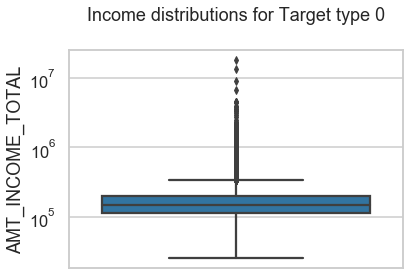

In [244]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.yscale('log')
sns.boxplot(data = df_app_0, y= 'AMT_INCOME_TOTAL')
plt.title("Income distributions for Target type 0")
plt.show()

1.As we can see there are outliers in income total.
2.Income amount is mostly saggregated in third quartile. 

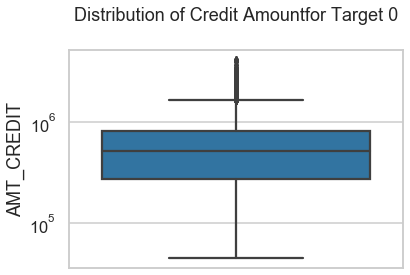

In [245]:
plt.yscale('log')
sns.boxplot(y="AMT_CREDIT", data=df_app_0)
plt.title("Distribution of Credit Amountfor Target 0")
plt.show()

1.There are outliers in the amount credited to the client's account.
2.Most of the credit values lies in the first quartile.

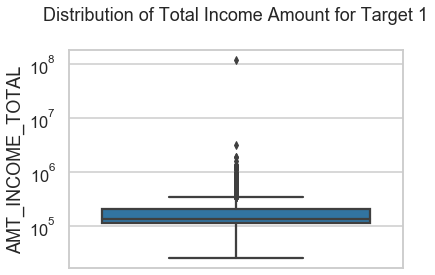

In [246]:
plt.yscale('log')
sns.boxplot(data = df_app_1, y= 'AMT_INCOME_TOTAL')
plt.title("Distribution of Total Income Amount for Target 1")
plt.show()

1.Amount Income have some outliers.
2.most of the clients incomes are in the first quartile.

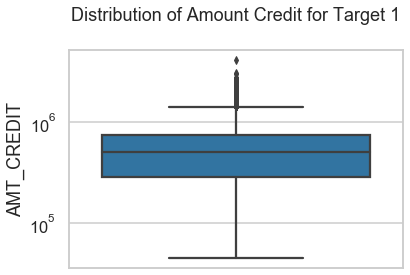

In [247]:
plt.yscale('log')
sns.boxplot(data = df_app_1, y= 'AMT_CREDIT')
plt.title("Distribution of Amount Credit for Target 1")
plt.show()

1. Amount credit have some outliers.
2. Most of the credits amounts are in third quartlile.

Bivariate analysis

In [248]:
# Analysing of Income Amount for target as 1 

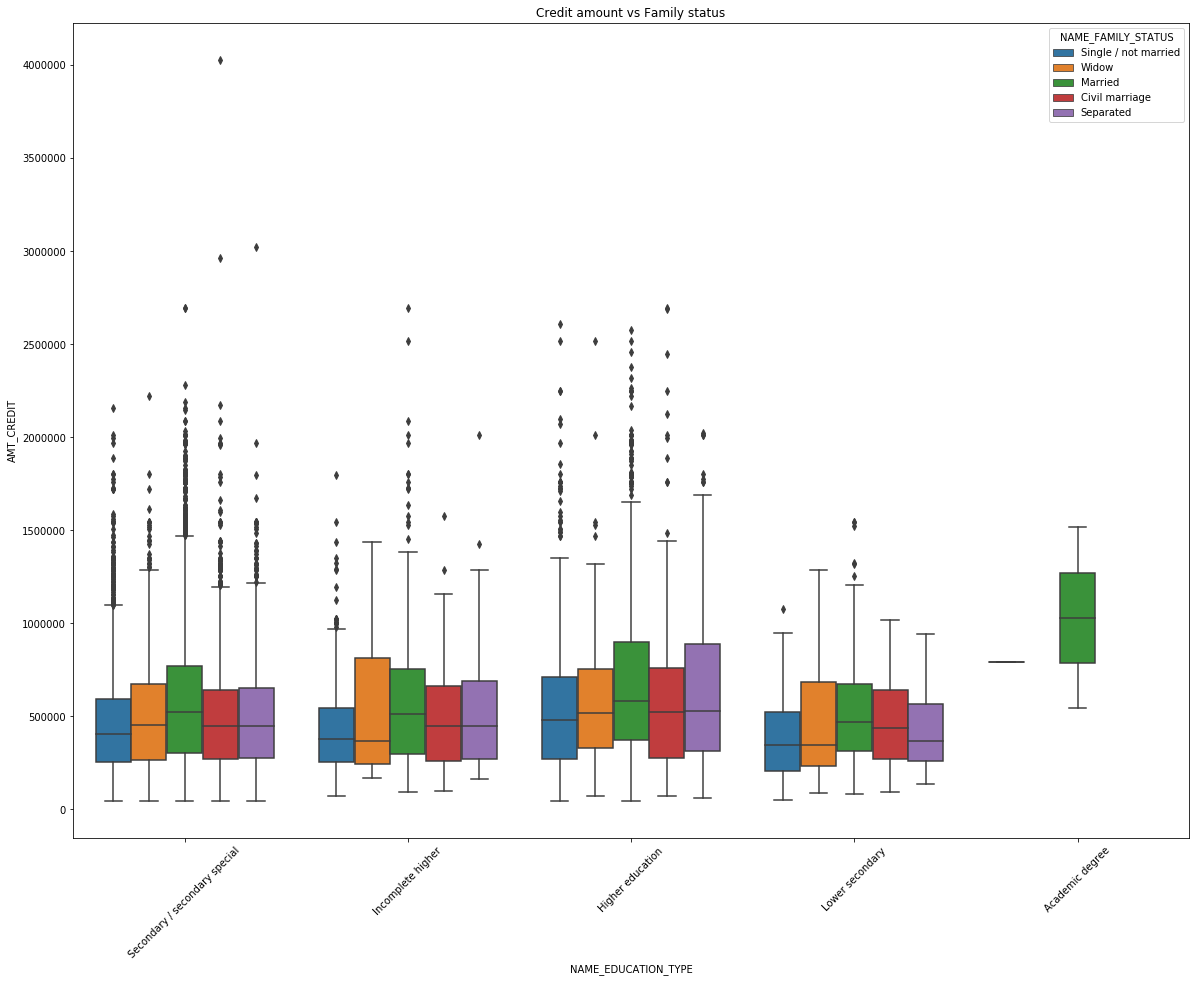

In [35]:
plt.figure(figsize = (20,15))
plt.xticks(rotation=45)
sns.boxplot(data = df_app_1,x ='NAME_EDUCATION_TYPE' , y= 'AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title("Credit amount vs Family status")
plt.show()

Following are the observations.
1. Customers having higher degree married or seperated are most likely to get more credits.
2. Married secondary and marries higher education have higher number of outliers.
3. Customers having lower secondary degree and seperated have lowest number of credits.

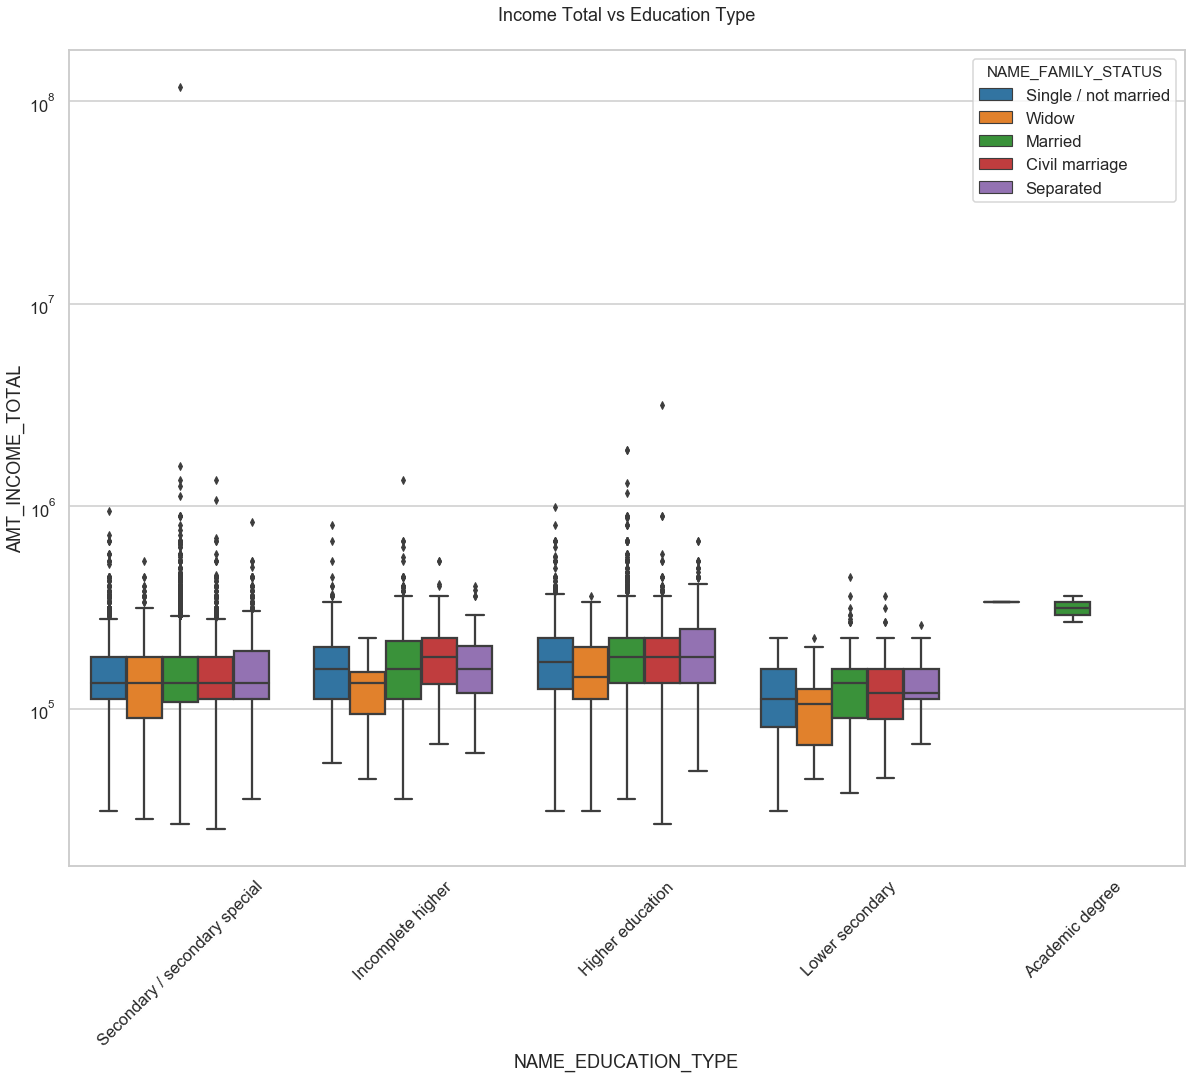

In [250]:
plt.figure(figsize = (20,15))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data = df_app_1,x ='NAME_EDUCATION_TYPE' , y= 'AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS')
plt.title("Income Total vs Education Type")
plt.show()

Following are the observations.
1. Customers with higher educations have relatively higher income irrespective to their family status.
2. Customers with lower secondary have relatively lower income irrespective to their family status. 
3. Higher education customer have larger number of outliers.
4. From both the graph above customers with academic degree have higher degree but have higher income also. 
5. Annual Income for Higher Education customers is eqaul.

#Bi-varient Analysing for target 0 

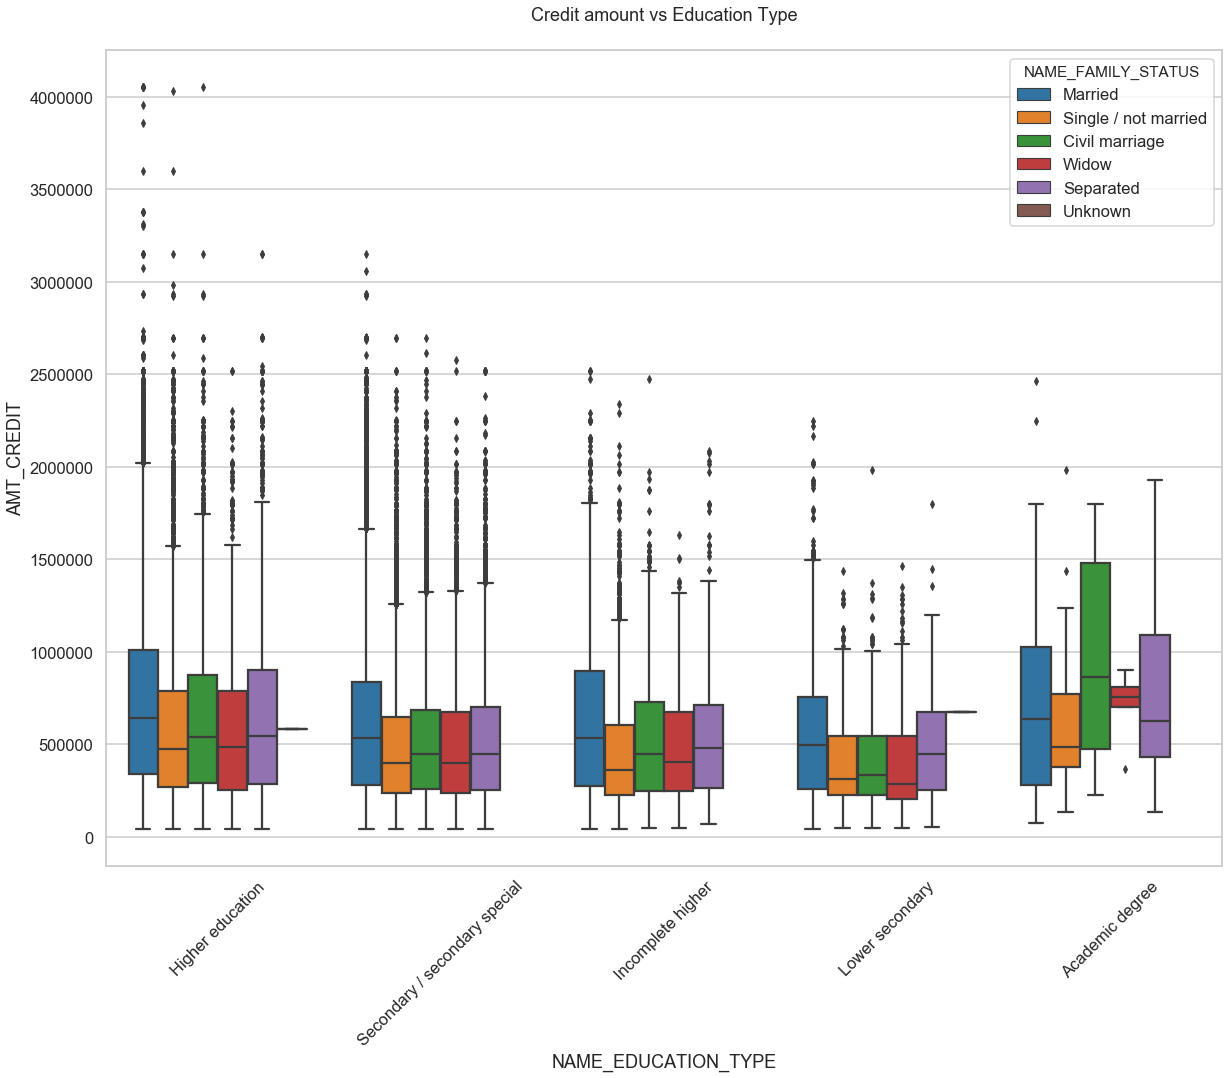

In [251]:
plt.figure(figsize = (20,15))
plt.xticks(rotation=45)
sns.boxplot(data = df_app_0,x ='NAME_EDUCATION_TYPE' , y= 'AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title("Credit amount vs Education Type")
plt.show()

Following are the observations.
1. Customers with higher education have higher numbers of outliers.
2. Customers with academic degree and civil marriage have higher number of credits.

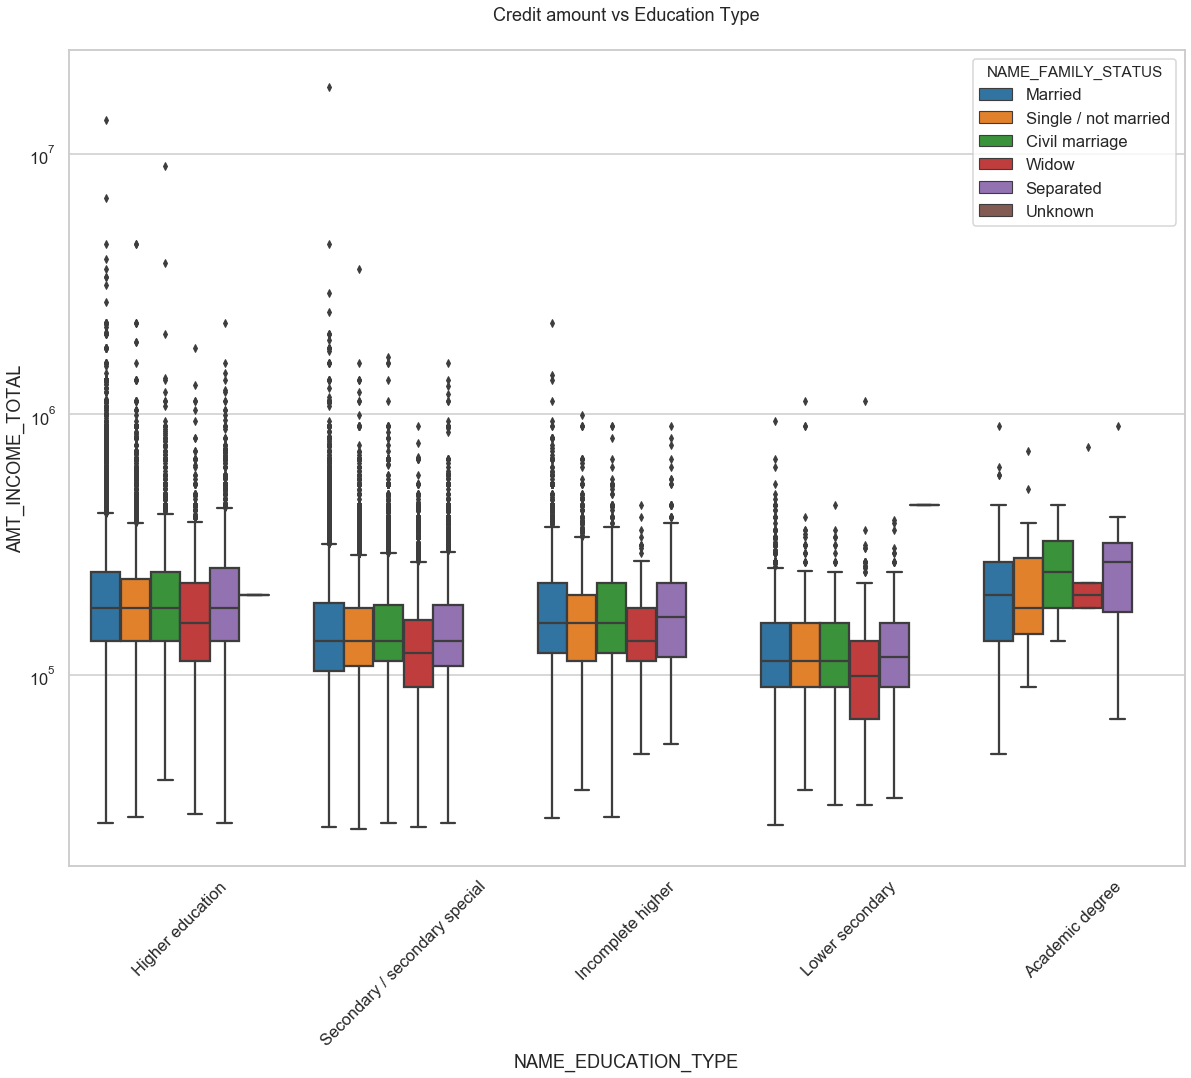

In [252]:
plt.figure(figsize = (20,15))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data = df_app_0,x ='NAME_EDUCATION_TYPE' , y= 'AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS')
plt.title("Credit amount vs Education Type")
plt.show()

Following are the observations.

1. There are outliers exists for all the family status.
2. Customers having academic degree have higher income range and also have higher credit also.

# Loading the previous application data.

In [38]:
df_prev = pd.read_csv("previous_application.csv")

In [39]:
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_prev.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [41]:
df_prev.info(verbose  = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [42]:
Col_null_prev = df_prev.isnull().sum()

In [43]:
Col_null_prev = Col_null_prev[Col_null_prev.values >=(0.3*len(df_app))]

In [44]:
Col_null_prev.values

array([ 372235,  895844,  385515,  895844, 1664263, 1664263,  820405,
        372230,  673065,  673065,  673065,  673065,  673065,  673065],
      dtype=int64)

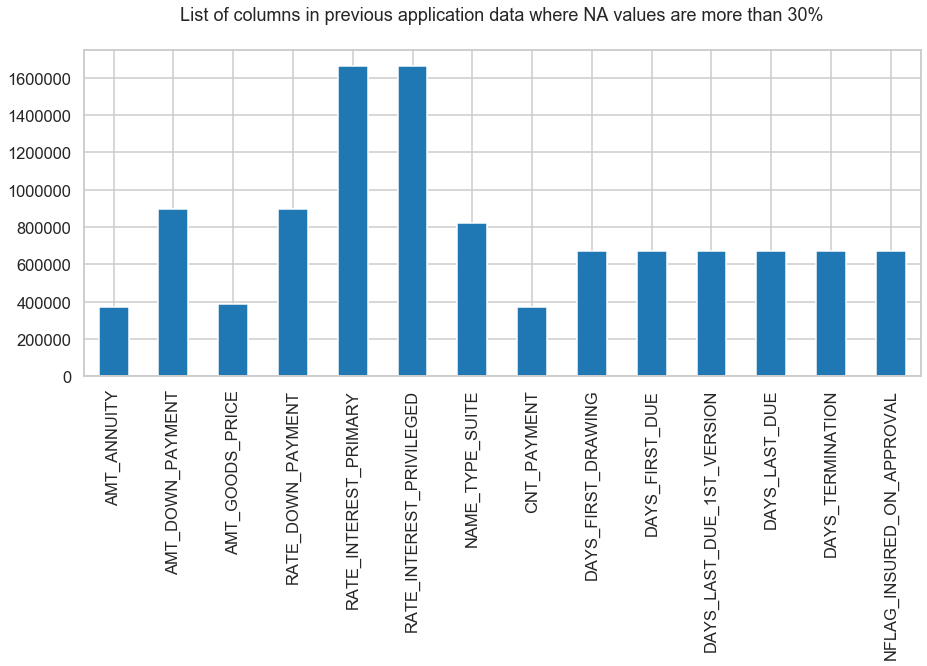

In [260]:
plt.figure(figsize = (15,6))
Col_null_prev.plot(kind='bar')
plt.title("List of columns in previous application data where NA values are more than 30%")
plt.show()

Following are the observation

1. Columns like AMT_ANNUAITY  are subject to whether loan gets approved or not hence null values in it is also a value 
   and we can't impute it. Similarya for column CNT_PAYMENT.
  

In [261]:
df_prev.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

Since a large number of column NAME_CASH_LOAN_PURPOSE is either 'XNA' or 'XAP' hence we can remove this column.

In [262]:
#creating a new data fram from previous application data having selective columns which we can merge with application data frame.

df_previous_new  = df_prev[['SK_ID_CURR','NAME_CONTRACT_TYPE','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_YIELD_GROUP','CHANNEL_TYPE','NAME_PORTFOLIO','NAME_CASH_LOAN_PURPOSE']    ]


In [263]:
df_previous_new.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_YIELD_GROUP,CHANNEL_TYPE,NAME_PORTFOLIO,NAME_CASH_LOAN_PURPOSE
0,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Repeater,middle,Country-wide,POS,XAP
1,108129,Cash loans,25188.615,607500.0,679671.0,Approved,Repeater,low_action,Contact center,Cash,XNA
2,122040,Cash loans,15060.735,112500.0,136444.5,Approved,Repeater,high,Credit and cash offices,Cash,XNA
3,176158,Cash loans,47041.335,450000.0,470790.0,Approved,Repeater,middle,Credit and cash offices,Cash,XNA
4,202054,Cash loans,31924.395,337500.0,404055.0,Refused,Repeater,high,Credit and cash offices,Cash,Repairs


In [264]:
#Univariante analysis

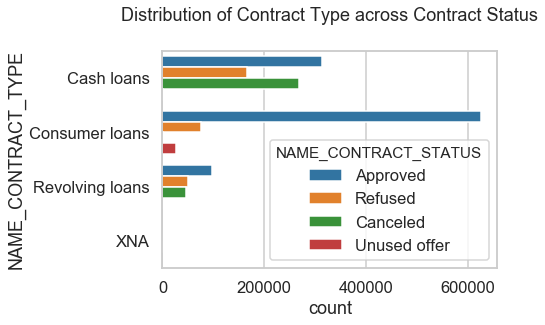

In [265]:

sns.countplot(data = df_previous_new, y= 'NAME_CONTRACT_TYPE',order=df_previous_new['NAME_CONTRACT_TYPE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')
plt.title("Distribution of Contract Type across Contract Status")
plt.show()

Following are the observations.

1.  Cash loans are refused by company most.
2.  Consumer loans type gets approved most and refused by client least.

In [266]:
df_previous_new.NAME_YIELD_GROUP.value_counts(normalize = True)

XNA           0.309670
middle        0.230828
high          0.211548
low_normal    0.192847
low_action    0.055107
Name: NAME_YIELD_GROUP, dtype: float64

In [267]:
# merging the two dataframe
df = pd.merge(left= df_previous_new ,right=df_app,how='inner',on='SK_ID_CURR')

In [268]:
#get the top 5 rows of the new data frame
df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_YIELD_GROUP,CHANNEL_TYPE,NAME_PORTFOLIO,NAME_CASH_LOAN_PURPOSE,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,...,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE
0,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Repeater,middle,Country-wide,POS,XAP,0,Cash loans,F,N,Y,1,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,0.046220,14443,-7392,-8447.0,-4120,NaN,1,1,0,1,1,0,NaN,3.0,1,1,TUESDAY,17,0,1,1,0,0,0,Military,NaN,0.683797,NaN,0.0557,0.0249,0.9821,0.7552,0.0736,0.04,0.0345,...,0.0743,0.0403,0.0345,0.3333,0.375,0.012,0.0496,0.0475,0.0,0.0214,0.0562,0.0249,0.9821,0.7585,0.0741,0.04,0.0345,0.3333,0.375,0.0119,0.0462,0.0464,0.0,0.0207,reg oper account,block of flats,0.0403,"Stone, brick",No,3.0,0.0,3.0,0.0,548.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50000-100000
1,271877,Consumer loans,68258.655,1800000.0,1754721.0,Refused,Repeater,low_normal,Regional / Local,POS,XAP,0,Cash loans,F,N,Y,1,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,0.046220,14443,-7392,-8447.0,-4120,NaN,1,1,0,1,1,0,NaN,3.0,1,1,TUESDAY,17,0,1,1,0,0,0,Military,NaN,0.683797,NaN,0.0557,0.0249,0.9821,0.7552,0.0736,0.04,0.0345,...,0.0743,0.0403,0.0345,0.3333,0.375,0.012,0.0496,0.0475,0.0,0.0214,0.0562,0.0249,0.9821,0.7585,0.0741,0.04,0.0345,0.3333,0.375,0.0119,0.0462,0.0464,0.0,0.0207,reg oper account,block of flats,0.0403,"Stone, brick",No,3.0,0.0,3.0,0.0,548.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50000-100000
2,271877,Consumer loans,12417.390,108400.5,119848.5,Approved,New,middle,Stone,POS,XAP,0,Cash loans,F,N,Y,1,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,0.046220,14443,-7392,-8447.0,-4120,NaN,1,1,0,1,1,0,NaN,3.0,1,1,TUESDAY,17,0,1,1,0,0,0,Military,NaN,0.683797,NaN,0.0557,0.0249,0.9821,0.7552,0.0736,0.04,0.0345,...,0.0743,0.0403

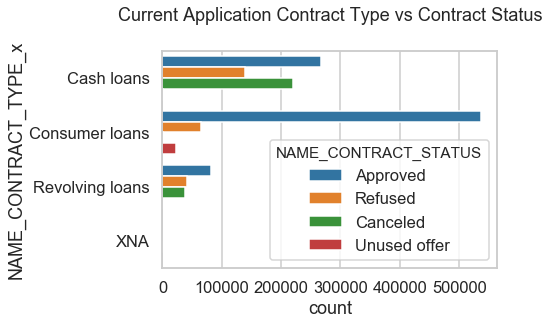

In [269]:
sns.countplot(data = df, y= 'NAME_CONTRACT_TYPE_x',order= df ['NAME_CONTRACT_TYPE_x'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')
plt.title("Current Application Contract Type vs Contract Status")
plt.show()

Below are the observations.

1. Cash loans type contracts have maximum cancelled status.
2. Consumer loans gets maximum approval.
3. Consumer loans have negligilbe or none canclled loans.

In [270]:
#Since 'NAME_CASH_LOAN_PURPOSE' have 'XA' and 'XAP' values hence we need to drop them and store the values in new datafram for further analysis.
df_new=df.drop(df[df['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_new=df_new.drop(df_new[df_new['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)


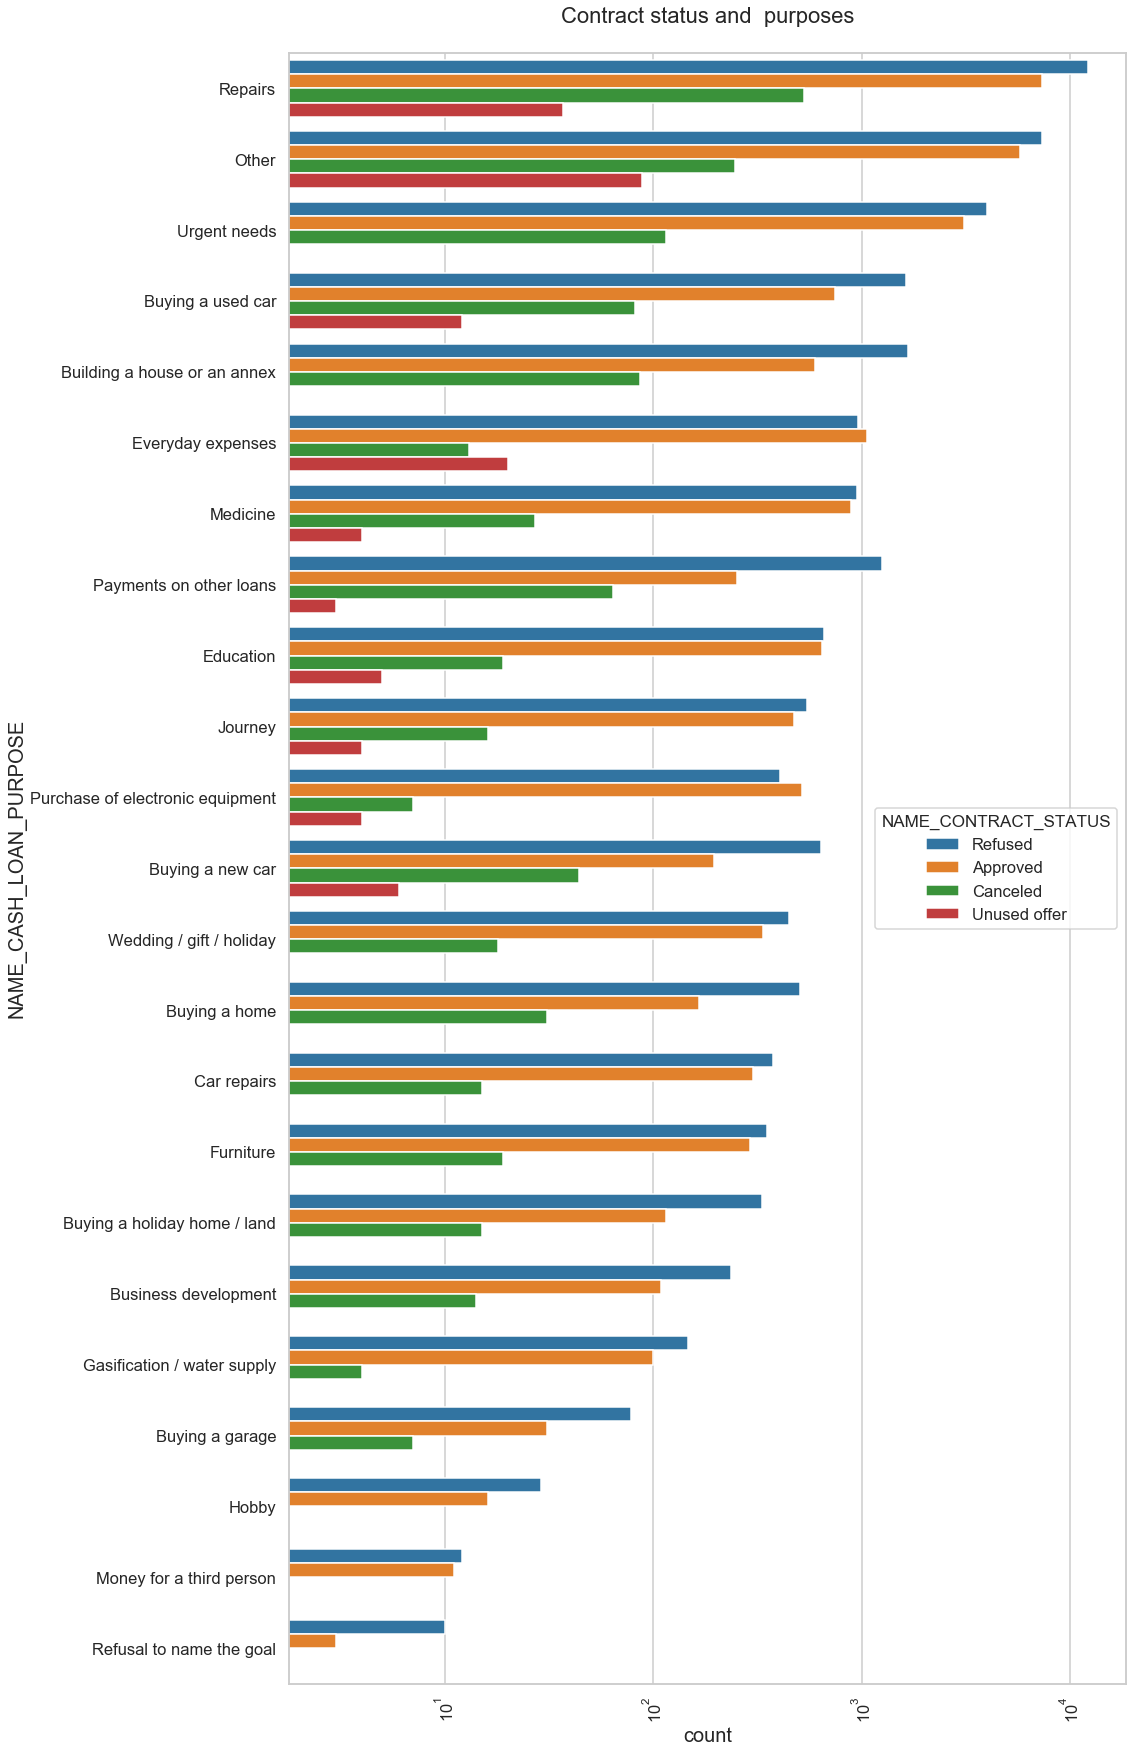

In [271]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Contract status and  purposes')
sns.countplot(data = df_new, y= 'NAME_CASH_LOAN_PURPOSE',order= df_new ['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')
plt.show()

Following are the observations.
1. Loans for hobby , money for third person have no cancellation.
2. Loans for Repairs have most number of cancellations.
3. Lons for Education have equal number of Approved and refusal of the loan.

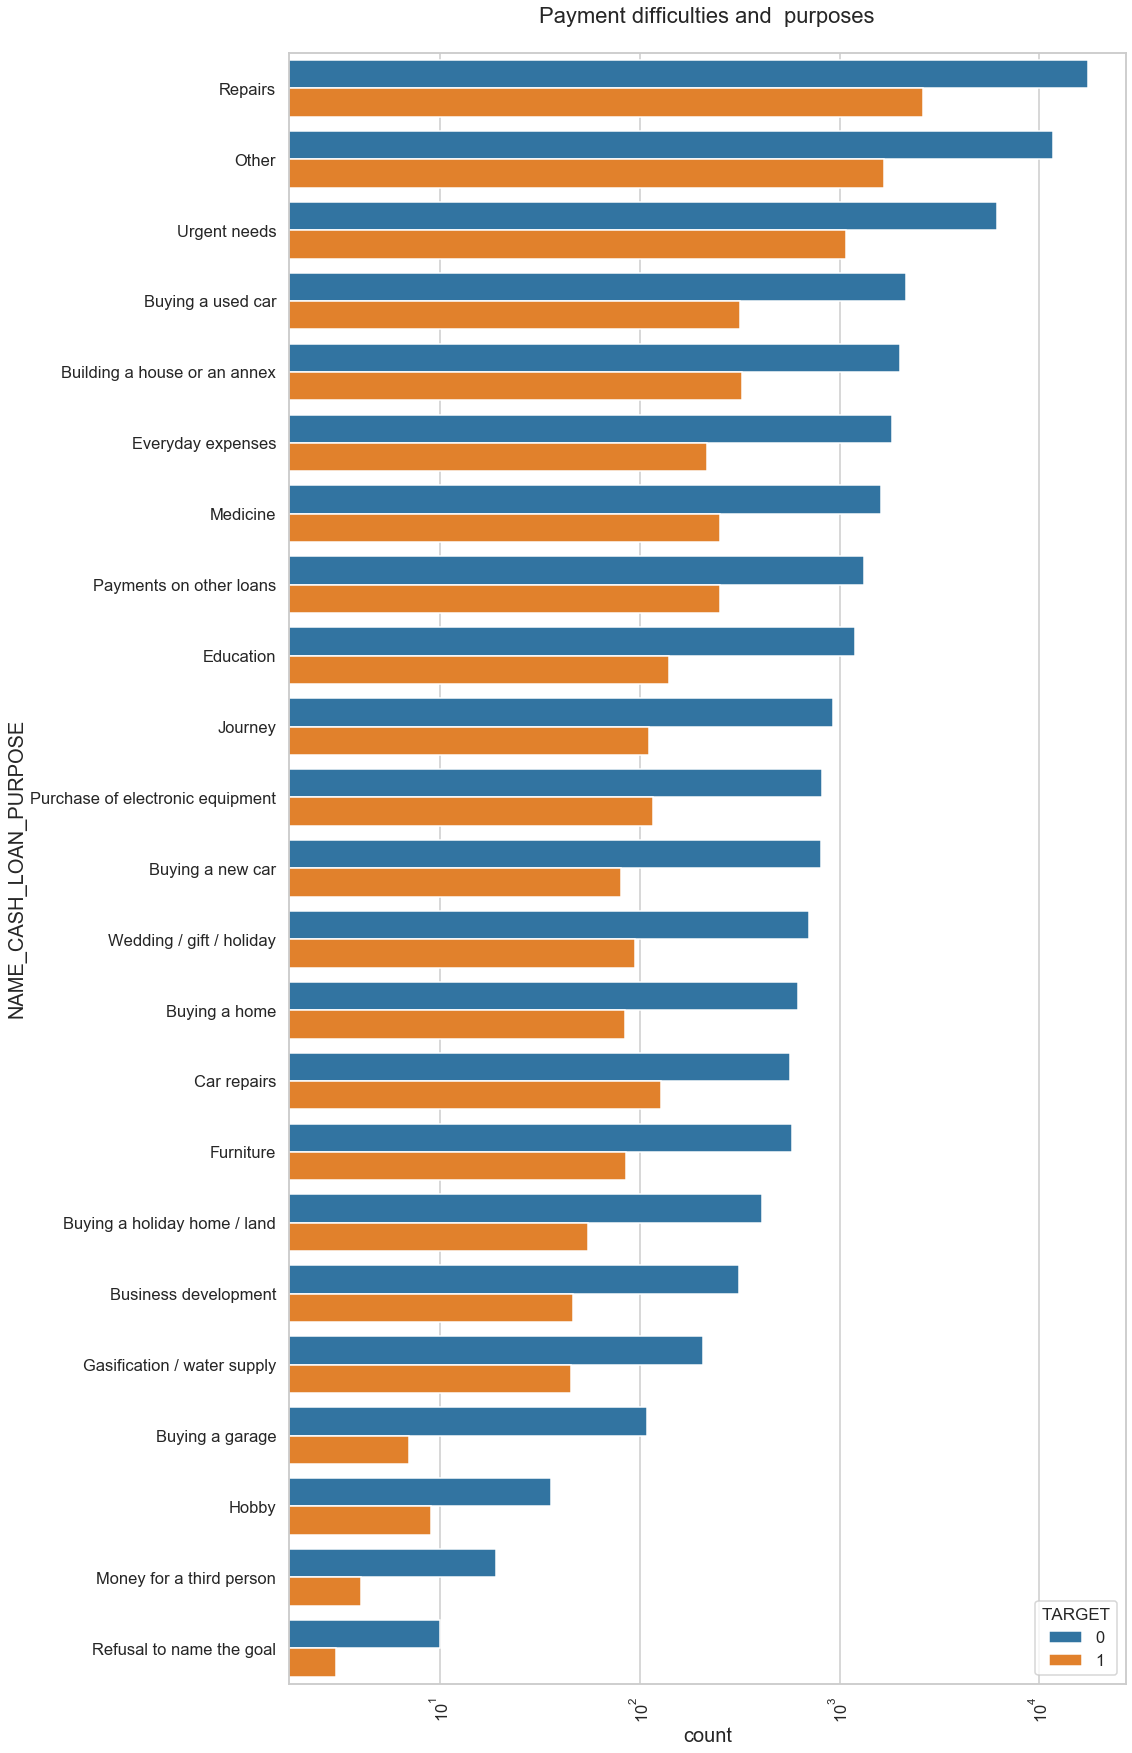

In [272]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Payment difficulties and  purposes')
sns.countplot(data = df_new, y= 'NAME_CASH_LOAN_PURPOSE',order= df_new['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')

Following are the observation.

1. Loan taken for repairs have maximum difficulties of payment on time.
2. Loan taken for Hobby, Money for a third person and Buying a garage have comparatively less difficulties than other purpose.

In [273]:
#Bi varient analysis

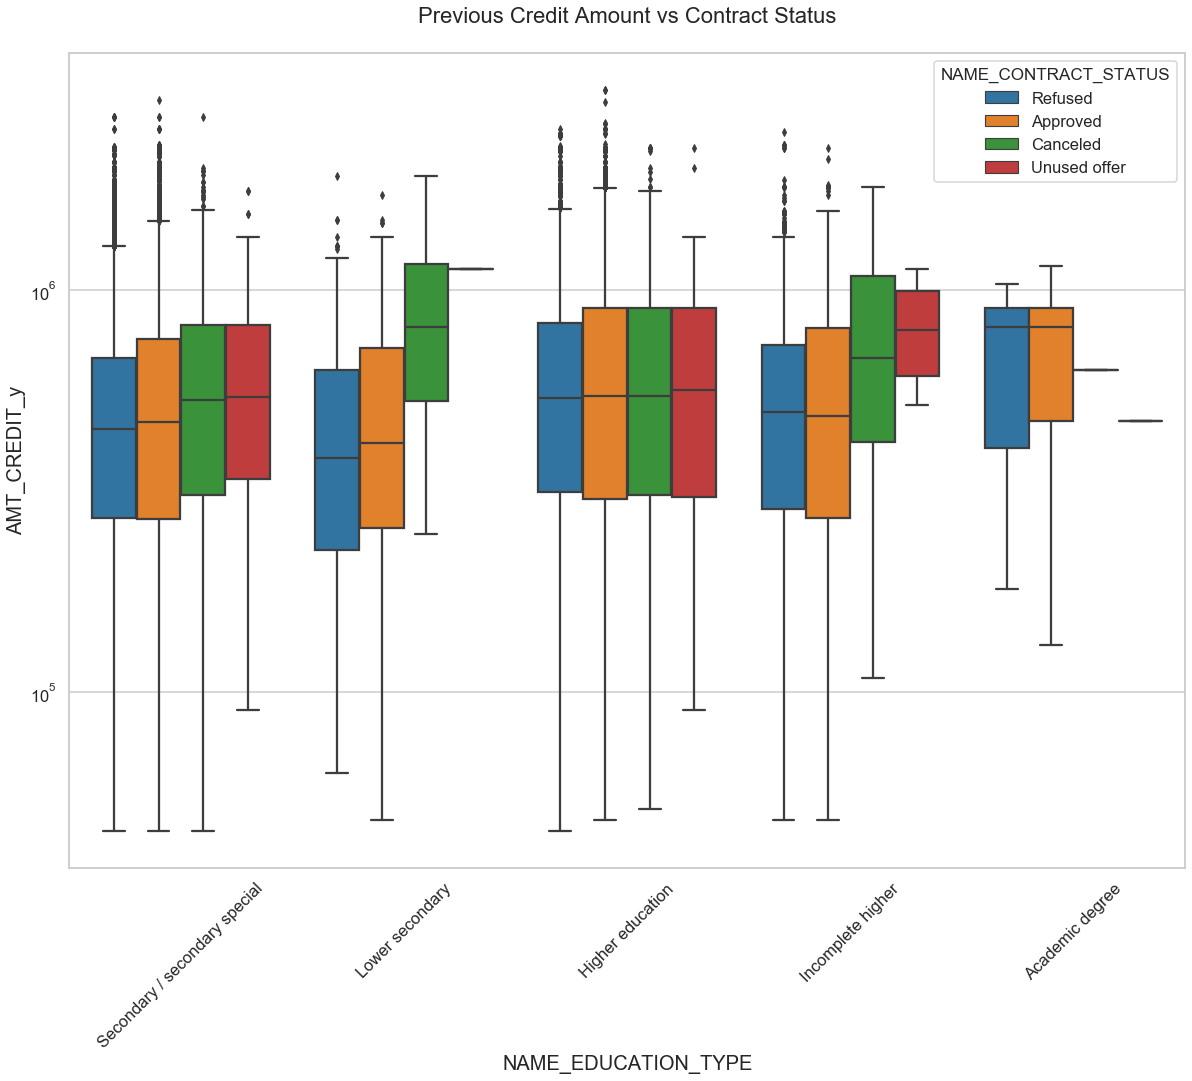

In [274]:
plt.figure(figsize = (20,15))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data = df_new,x ='NAME_EDUCATION_TYPE' , y= 'AMT_CREDIT_y', hue ='NAME_CONTRACT_STATUS')
plt.title("Previous Credit Amount vs Contract Status")
plt.show()

Following are the observations.
1. Contract status as approved for Academic degree have large number of credit amount.
2. For education status as Incmoplete higher and Seconday special distribution is almost eqlau across the contract status.
3. There are ouliers for present for the education type.

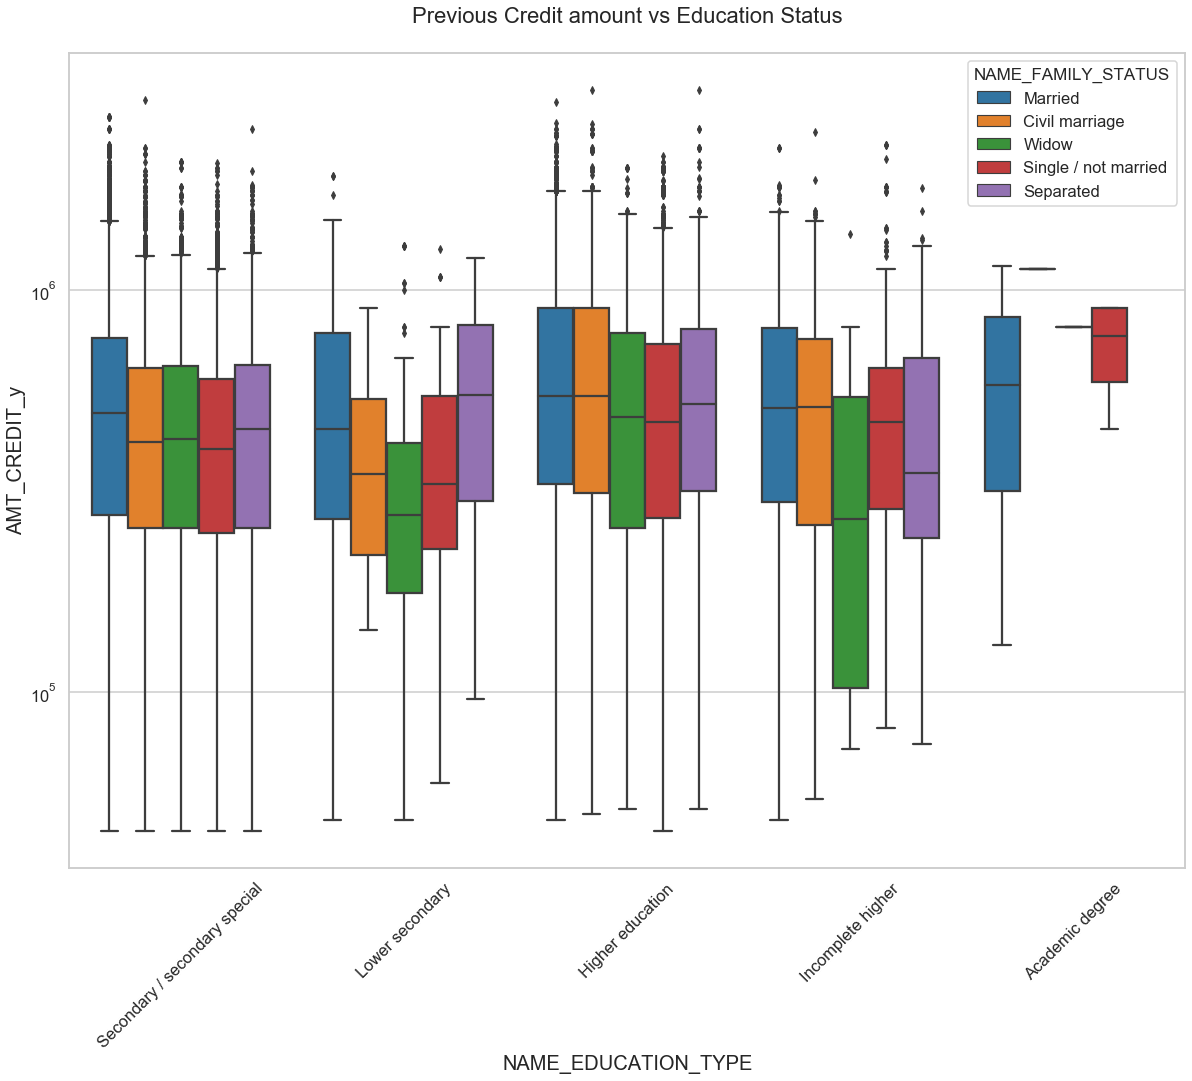

In [275]:
plt.figure(figsize = (20,15))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data = df_new,hue ='NAME_FAMILY_STATUS' , y= 'AMT_CREDIT_y', x ='NAME_EDUCATION_TYPE')
plt.title("Previous Credit amount vs Education Status")
plt.show()

Following are the observations.
1. Clients with academic degree got higher previous credits except for single family status clients.
2. Clients with lower secondary academic degree have lowest previous credits for family status for civil marriage, single and widow.


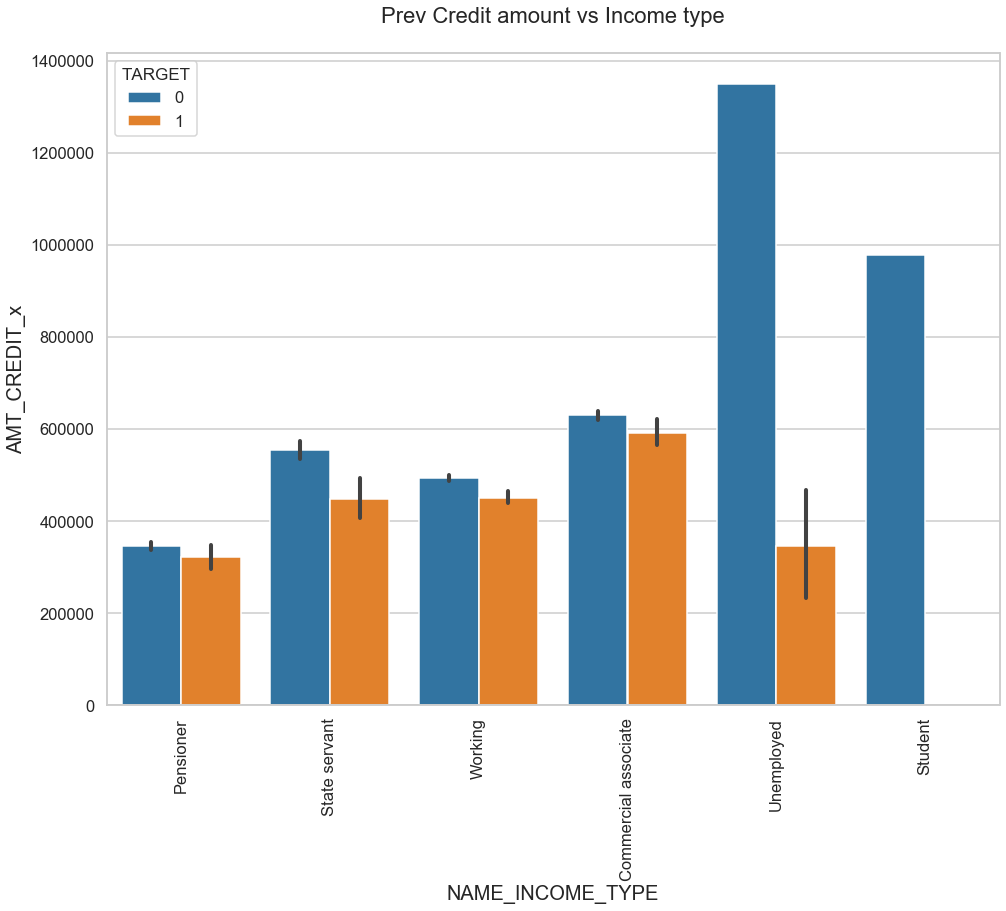

In [276]:

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =df_new, y='AMT_CREDIT_x',hue='TARGET',x='NAME_INCOME_TYPE')
plt.title('Prev Credit amount vs Income type')
plt.show()

the following observations were made 

a)Unemployed customers have comparatively lower default rate than pensioners


b) A high number of loans are left unsolicited by students

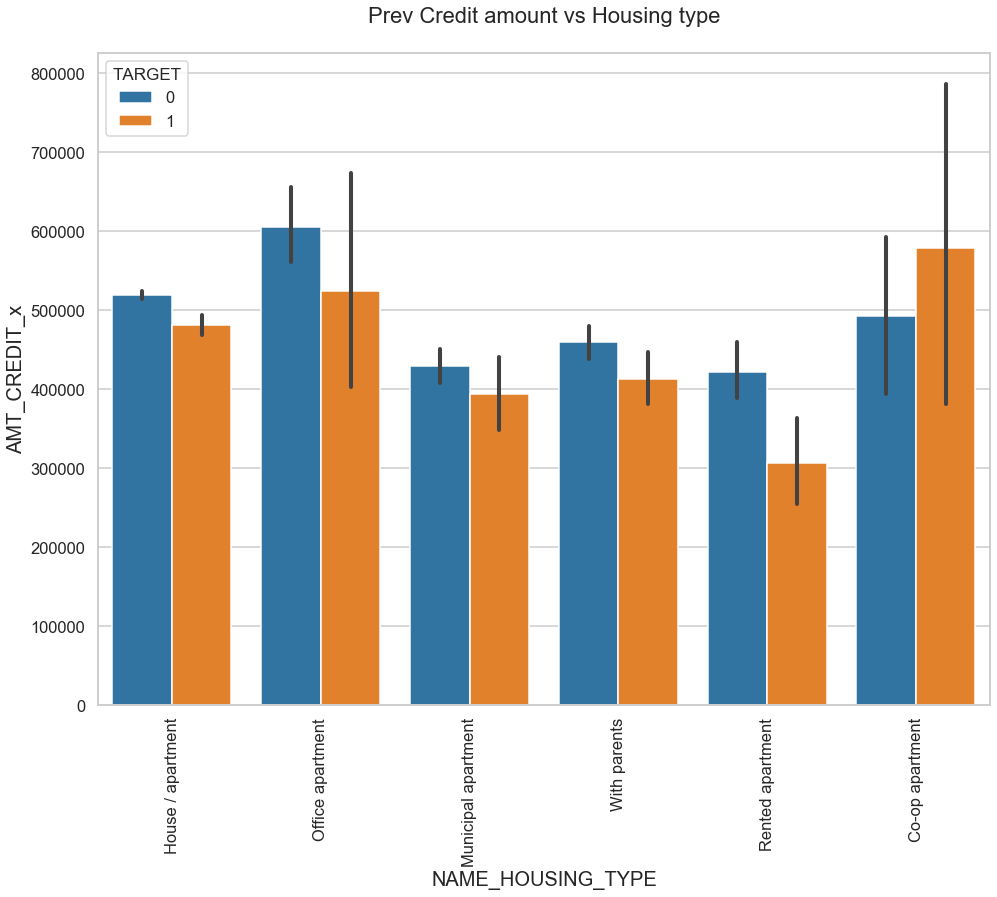

In [277]:

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =df_new, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Foloowing are the observations.
1. Client living in office apartment, co-op apartment and with parents have difficulties to pay back the payment.
2. Client living in munincipal apartment and rented apartment makes payments on time without failing.  

# Conclusion 

Loan purpose 'Repair' have high number of payment difficulties

Clients living in munincipal apartment and with parents are having most number of successful payments and least unscucssesful payment

Income type as students should be given more loans as there is no difficulties of payment of loans.

Company should avoid giving cash loans as it have most number of payment difficulties.